In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_test,y_test)=tf.keras.datasets.mnist.load_data()

The label is  7


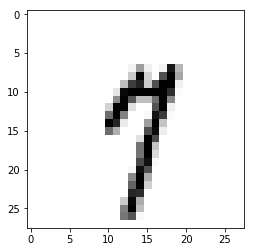

In [0]:
# what does a custom image in dataset looks like
image_index = 6713
#print('input i between 0 and 59999')
#image_index=input(i)
print('The label is ',y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [0]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255.0
x_test /= 255.0
print('x_train shape ', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape  (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


Using TensorFlow backend.
W0627 18:02:06.353555 139811886008192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 18:02:06.400974 139811886008192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 18:02:06.409106 139811886008192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 18:02:06.456125 139811886008192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0627 18:02:06.489189 1398118

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)


W0627 18:02:54.551623 139811886008192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0627 18:02:54.588737 139811886008192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0627 18:02:54.886042 139811886008192 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 39s 651us/step - loss: 0.2151 - acc: 0.9357
Epoch 2/10
60000/60000 [==============================] - 39s 643us/step - loss: 0.0844 - acc: 0.9741
Epoch 3/10
60000/60000 [==============================] - 39s 645us/step - loss: 0.0591 - acc: 0.9814
Epoch 4/10
60000/60000 [==============================] - 39s 653us/step - loss: 0.0446 - acc: 0.9863
Epoch 5/10
60000/60000 [==============================] - 39s 650us/step - loss: 0.0351 - acc: 0.9883
Epoch 6/10
60000/60000 [==============================] - 39s 653us/step - loss: 0.0291 - acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 39s 656us/step - loss: 0.0281 - acc: 0.9905
Epoch 8/10
60000/60000 [==============================] - 39s 652us/step - loss: 0.0221 - acc: 0.9923
Epoch 9/10
60000/60000 [==============================] - 39s 658us/step - loss: 0.0198 - acc: 0.9930
Epoch 10/10
60000/60000 [==============================] - 39s 655us/step - loss: 

In [0]:
# Evaluate
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 194us/step


[0.06314683511145122, 0.985]

Thus gaining an accuracy of 98.5%

8


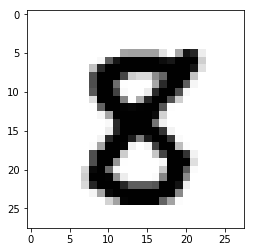

In [0]:
image_index = 6199
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())


In [0]:
#x_test[9999]='eight.png'
pred = model.predict(x_test[9999].reshape(1, 28, 28, 1))
print(pred.argmax())


6
